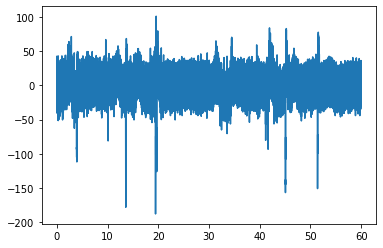

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
#%matplotlib notebook
import matplotlib.pyplot as plt

OVERLAP = 0.5 # in seconds
WIN_LEN = 1 # in seconds

data = pd.read_csv('../muse-datasets/raw-data/nasui-focused-2.csv')
data = data.iloc[:,:5]

data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data = data.loc[(data['timestamps'] >= 3) & (data['timestamps'] < 63)]
data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data.rename(columns={'timestamps':'Time'},inplace=True)
data.reset_index(drop=True,inplace=True)

dataT = pd.DataFrame(data=data.Time)
data = data.drop('Time',axis=1)

# Center the data
data = data - data.mean()

plt.plot(dataT, data.TP9)

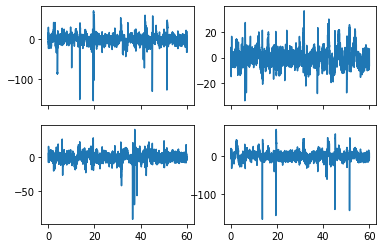

In [2]:
# Filter the 50Hz AC noise
Fs = 256
Fn = Fs / 2
f_low = 49.8 / Fn
f_high = 50.2 / Fn

#b, a = signal.cheby2(5,20,[f_low,f_high], btype='bandstop')
b, a = signal.cheby2(10,20,f_low, btype='low')
#b,a = signal.butter(5,[f_low,f_high],btype='bandstop')

data.TP9 = signal.filtfilt(b, a, data.TP9)
data.AF7 = signal.filtfilt(b, a, data.AF7)
data.AF8 = signal.filtfilt(b, a, data.AF8)
data.TP10 = signal.filtfilt(b, a, data.TP10)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)
ax1.plot(dataT, data.TP9)
ax2.plot(dataT, data.AF7)
ax3.plot(dataT, data.AF8)
ax4.plot(dataT, data.TP10)

In [3]:
# Create 1 sec window
start = 0
end = start + 1

w = data.loc[(dataT.Time >= start) & (dataT.Time < end)]

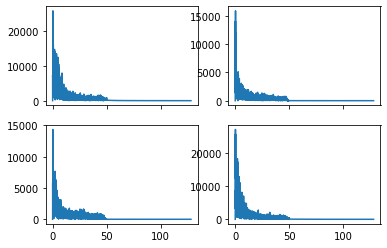

In [4]:
# Compute FFT on signal
#%matplotlib notebook
frq_axis = (Fs/2)*np.linspace(0,1,len(data.TP9)/2 + 1)

dataTP9 = np.fft.rfft(data.TP9)
dataAF7 = np.fft.rfft(data.AF7)
dataAF8 = np.fft.rfft(data.AF8)
dataTP10 = np.fft.rfft(data.TP10)


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)

ax1.plot(frq_axis, abs(dataTP9))
ax2.plot(frq_axis, abs(dataAF7))
ax3.plot(frq_axis, abs(dataAF8))
ax4.plot(frq_axis, abs(dataTP10))

In [5]:
magTP9 = np.asarray([abs(dataTP9[np.where(frq_axis == i+1)]) for i in range(50)])[:,0]
len(magTP9)

50

In [6]:
maxTP9 = sorted(magTP9,reverse=True)[:10]
maxTP9

[7359.685564930466,
 6753.472948020628,
 5883.935834251688,
 4740.909793224841,
 4376.915404448599,
 4163.6849136177125,
 4055.0171624861755,
 3199.667158387746,
 2819.29237956294,
 2505.424131449893]

In [9]:
magTP9 = pd.DataFrame(magTP9).T
maxTP9 = pd.DataFrame(maxTP9).T
#magTP9 = pd.DataFrame(data=magTP9, index=[f'fft_mag_{count}' for count,idx in enumerate(magTP9)]).T
#maxTP9 = pd.DataFrame(data=maxTP9, index=[f'fft_max_{count}' for count,idx in enumerate(maxTP9)]).T

In [26]:
clas_col = pd.DataFrame()
clas_col['class'] = 5 * np.ones(10)
clas_col

,class
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
5,5.0
6,5.0
7,5.0
8,5.0
9,5.0
